# Image similarity

We'll need a way to keep track of how well our algorithm performs. To do that we'll need an image similirity coefficient.

In [23]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

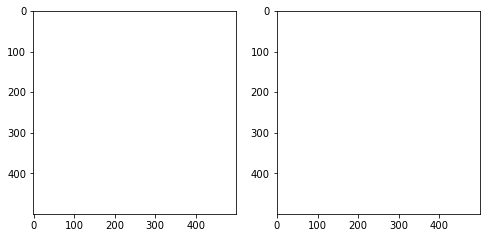

In [31]:
img_1 = np.full((500, 500, 3), 255, dtype=np.uint8)
img_2 = np.full((500, 500, 3), 255, dtype=np.uint8)

#img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) / 255.0
#img_1 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY) / 255.0

#img_1 = cv2.line(img_1, np.array((0, 0)), np.array((500, 500)), (0, 0, 0), 10)
#img_2 = cv2.line(img_2, (0, 250), (500, 500), (0, 0, 0), 5)

fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(8, 8))
ax1.imshow(img_1, cmap="gray")
ax2.imshow(img_2, cmap="gray")
plt.show()

In [20]:
img_1 - img_

array([0., 1.])